In [33]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import warnings
warnings.filterwarnings('ignore')

##Load Spotify Dataset

In [34]:
df = pd.read_csv("/content/Popular_Spotify_Songs.csv", encoding='latin1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [35]:
#different dataset
df1 = pd.read_csv("/content/songs_normalize.csv")
df1.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [36]:
#Shape of DF1 different
df1.shape

(2000, 18)

In [37]:
df.shape

(953, 24)

##EDA(Explotary Data Analysis) and Data Cleaning

In [38]:
#check if there are any duplicated
df.duplicated().sum()

0

In [39]:
#information about the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [40]:
#dropping the duplicate values
df1.drop_duplicates(inplace=True)

In [41]:
#Shape of DF1 different
df1.shape

(1941, 18)

In [42]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [43]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [44]:
# checking dataset columns
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [45]:
# Droping unecessary columns
df=df.drop(columns =  ['in_apple_playlists','in_apple_charts','in_deezer_playlists','in_deezer_playlists','in_shazam_charts','in_deezer_charts'])

In [46]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   bpm                   953 non-null    int64 
 10  key                   858 non-null    object
 11  mode                  953 non-null    object
 12  danceability_%        953 non-null    int64 
 13  valence_%             953 non-null    int64 
 14  energy_%              953 non-null    int64 
 15  acousticness_%        953 non-null    in

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1941 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1941 non-null   object 
 1   song              1941 non-null   object 
 2   duration_ms       1941 non-null   int64  
 3   explicit          1941 non-null   bool   
 4   year              1941 non-null   int64  
 5   popularity        1941 non-null   int64  
 6   danceability      1941 non-null   float64
 7   energy            1941 non-null   float64
 8   key               1941 non-null   int64  
 9   loudness          1941 non-null   float64
 10  mode              1941 non-null   int64  
 11  speechiness       1941 non-null   float64
 12  acousticness      1941 non-null   float64
 13  instrumentalness  1941 non-null   float64
 14  liveness          1941 non-null   float64
 15  valence           1941 non-null   float64
 16  tempo             1941 non-null   float64
 17  

In [48]:
#check for duplicates in the 'track_name' column
df[df['track_name'].duplicated()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
417,Die For You,Joji,1,2022,11,4,1703,0,246390068,148,G#,Major,47,15,52,38,13,29,5
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,1950,1,1,10585,0,473248298,143,D,Major,60,86,32,88,0,34,6
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,166,C#,Major,70,57,57,9,20,11,7
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,121,G#,Major,75,53,74,2,0,11,5
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,109,A#,Minor,84,72,74,10,0,34,7
825,Flowers,Lauren Spencer Smith,1,2021,8,9,801,0,184826429,138,D#,Major,70,31,44,84,0,9,39
831,Daylight,Harry Styles,1,2022,5,20,2775,0,290833204,146,NaN,Major,69,63,45,48,0,18,4
852,Numb,"Marshmello, Khalid",2,2022,6,10,3879,2,295307001,120,NaN,Minor,91,63,77,12,1,10,5
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595,170,NaN,Major,56,52,64,11,0,45,7
922,Miss You,Southstar,1,1982,5,16,2020,0,154356956,145,A,Major,66,24,58,17,0,19,5


In [49]:
#Let's check for duplicates. We are going to do so specifically in the "track_name" column.
# Check for duplicates based on both 'track_name' and 'artist(s)_name'
duplicate =df[df.duplicated(['track_name', 'artist(s)_name'], keep=False)]
duplicate.count()

track_name              8
artist(s)_name          8
artist_count            8
released_year           8
released_month          8
released_day            8
in_spotify_playlists    8
in_spotify_charts       8
streams                 8
bpm                     8
key                     6
mode                    8
danceability_%          8
valence_%               8
energy_%                8
acousticness_%          8
instrumentalness_%      8
liveness_%              8
speechiness_%           8
dtype: int64

In [50]:
df['artist(s)_name'].value_counts()

artist(s)_name
Taylor Swift                 34
The Weeknd                   22
Bad Bunny                    19
SZA                          19
Harry Styles                 17
                             ..
Karol G, Ovy On The Drums     1
Coolio, L.V.                  1
Kordhell                      1
Kenia OS                      1
Feid, Sech, Jhayco            1
Name: count, Length: 645, dtype: int64

In [51]:
# checking for null values
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [52]:
# Fill missing values
df['key'].fillna('Unknown', inplace=True)


# Verify there are no missing values left
print(df.isnull().sum())

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


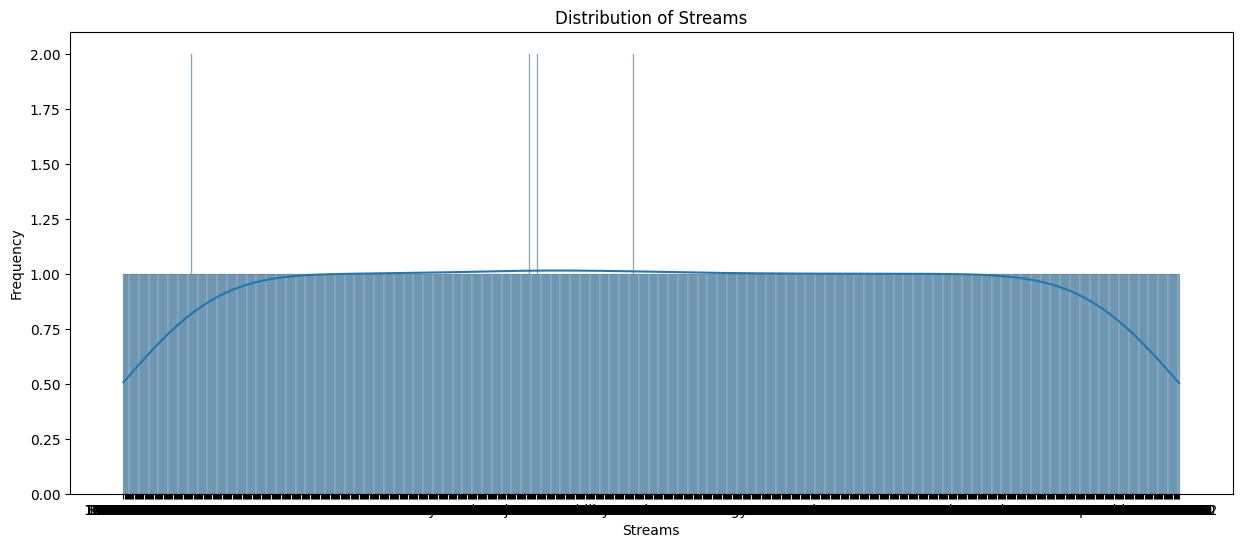

In [53]:
plt.figure(figsize=(15, 6))
sns.histplot(df['streams'], bins=30, kde=True)
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.show()

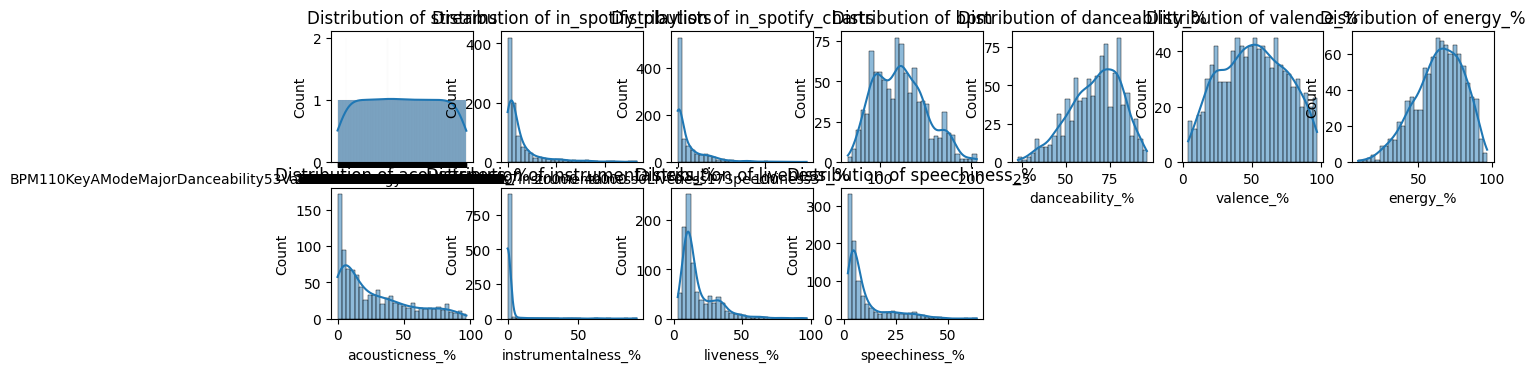

In [54]:
# Plot distributions for numerical features
numerical_columns = ['streams', 'in_spotify_playlists', 'in_spotify_charts',
                     'bpm', 'danceability_%', 'valence_%',
                     'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(10, 7, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

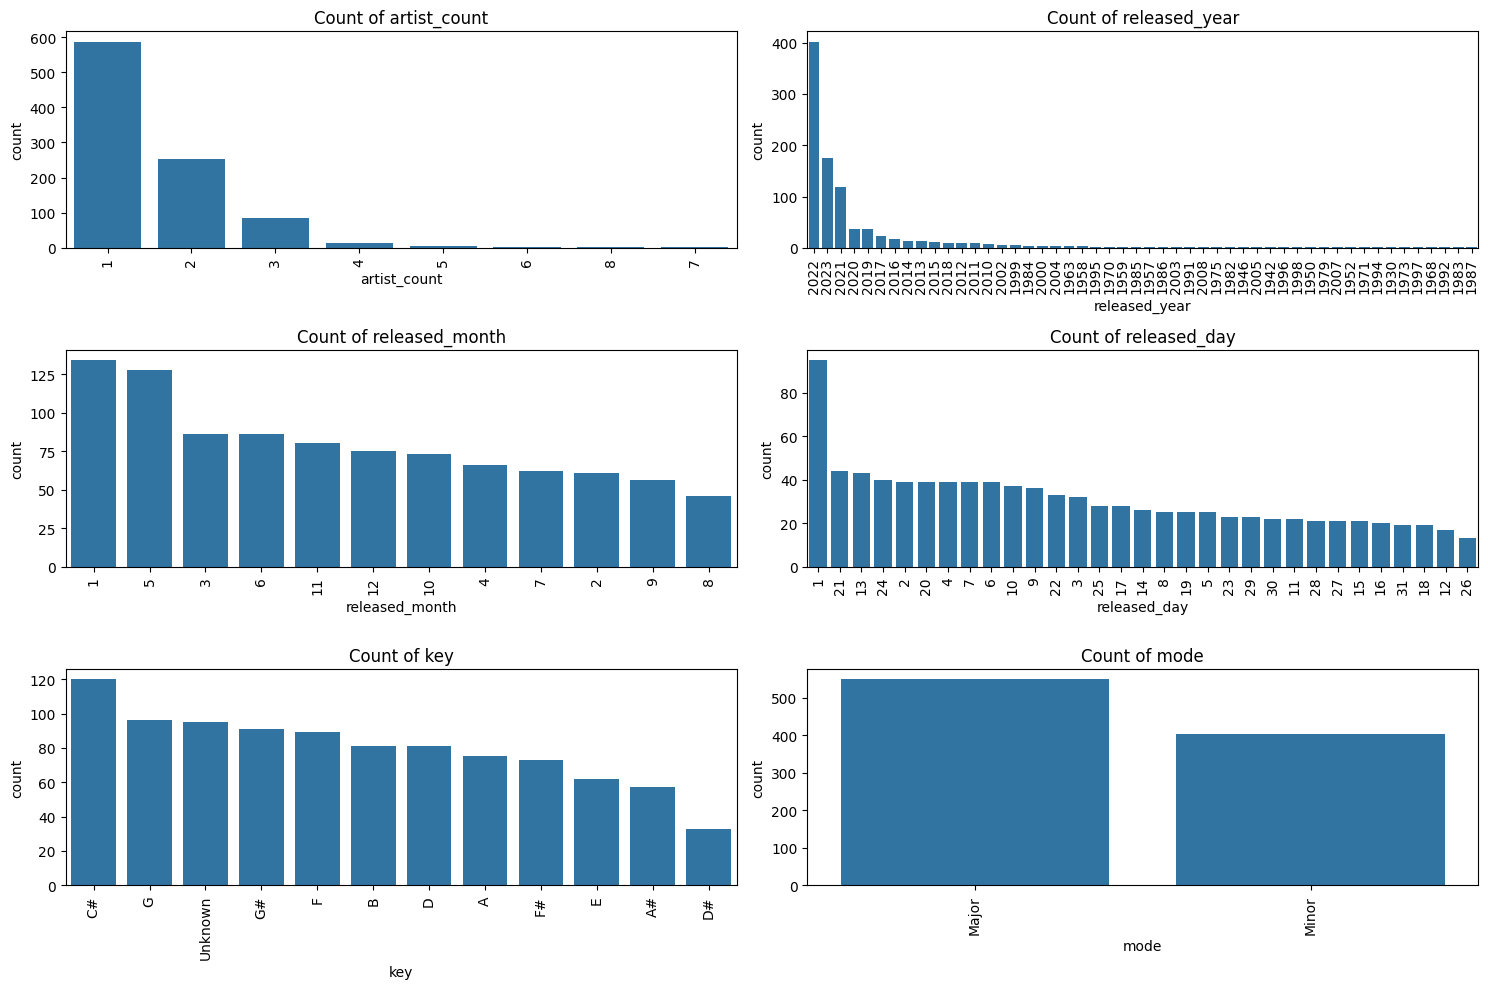

In [55]:
# Plot counts for categorical features
categorical_columns = ['artist_count', 'released_year', 'released_month', 'released_day', 'key', 'mode']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Number of Songs Released Each Year

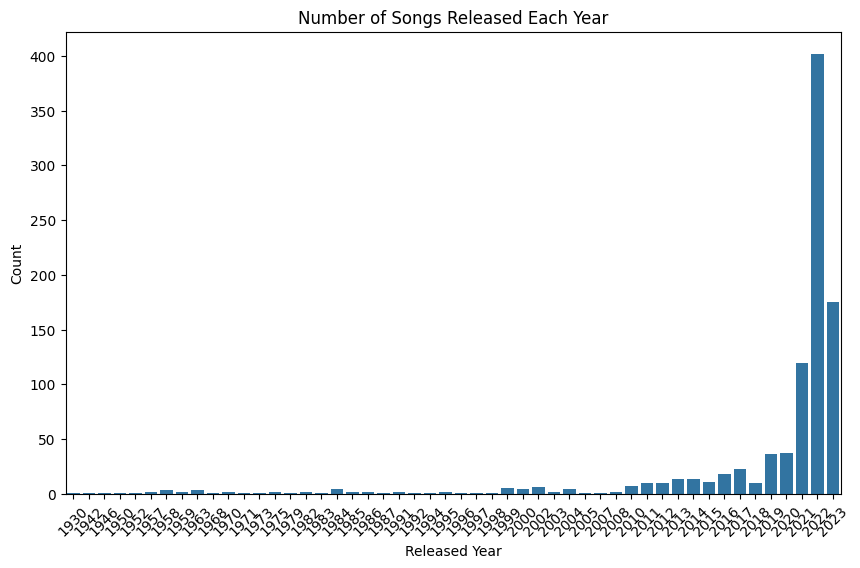

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(x='released_year', data=df)
plt.title('Number of Songs Released Each Year')
plt.xlabel('Released Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Seasonal Analysis:¶
Analyze the distribution of song releases by month to identify any seasonal patterns

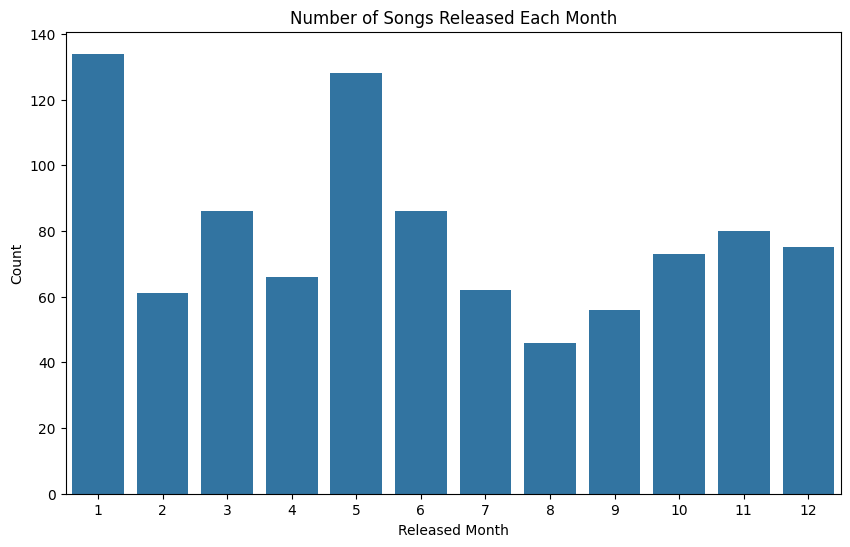

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(x='released_month', data=df)
plt.title('Number of Songs Released Each Month')
plt.xlabel('Released Month')
plt.ylabel('Count')
plt.show()

#Artist Analysis:
Investigate whether specific artists are contributing more to the increase in song releases in recent years.

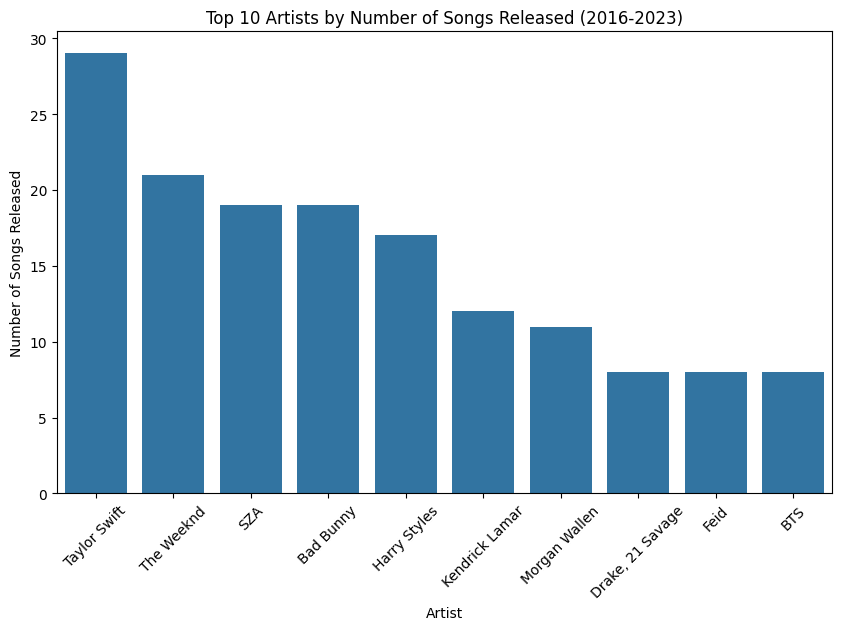

In [58]:
recent_years = df[df['released_year'] > 2015]
top_artists = recent_years['artist(s)_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.title('Top 10 Artists by Number of Songs Released (2016-2023)')
plt.xlabel('Artist')
plt.ylabel('Number of Songs Released')
plt.xticks(rotation=45)
plt.show()

In [59]:
#Top artist as per number of realese
print(top_artists)

artist(s)_name
Taylor Swift        29
The Weeknd          21
SZA                 19
Bad Bunny           19
Harry Styles        17
Kendrick Lamar      12
Morgan Wallen       11
Drake, 21 Savage     8
Feid                 8
BTS                  8
Name: count, dtype: int64


In [60]:
fig=px.histogram(df1.groupby('genre',as_index=False).count().sort_values(by='song',ascending=False),x='genre',y='song',color_discrete_sequence=['green'],template='plotly_dark',marginal='box',title='<b>Total songs based on genres</b>')
fig.update_layout(title_x=0.5)

In [61]:
fig=px.histogram(df1.groupby('genre',as_index=False).sum().sort_values(by='popularity',ascending=False),x='genre',y='popularity',color_discrete_sequence=['lightgreen'],template='plotly_dark',marginal='box',title='<b>Popular genres based on pouplarity</b>')
fig.update_layout(title_x=0.5)

In [62]:
px.bar(df1.groupby('artist',as_index=False).count().sort_values(by='song',ascending=False).head(50),x='artist',y='song',labels={'song':'Total Songs'},width=1000,color_discrete_sequence=['green'],text='song',title='<b> List of Songs Recorded by Each Singer')

In [63]:
px.bar(df1.groupby('artist',as_index=False).sum().sort_values(by='popularity',ascending=False).head(30),x='artist',y='popularity',color_discrete_sequence=['lightgreen'],template='plotly_dark',text='popularity',title='<b>Top 30 Popular Singers')

In [64]:
fig=px.pie(df1.groupby('explicit',as_index=False).count().sort_values(by='song',ascending=False),names='explicit',values='song',labels={'song':'Total songs'},hole=.6,color_discrete_sequence=['green','crimson'],template='plotly_dark',title='<b>Songs having explicit content')
fig.update_layout(title_x=0.5)

##CONCLUSION
From the Analysis, we can conclude that the most popular genre in the music market is pop.\ According to the musicians, pop music is inherently popular because it creates a sense of familiarity for listeners. Therefore, when they hear the same 'woop' throughout the genre, they're more inclined to ease into a piece of music they've never heard because it sounds familiar.\ Almost 28% of Songs contains Explicit Content and on coming to popularity, explicit content songs Has high median popularity.\The top 3 singers who recorded maximum songs in their album are Rihanna, Drake and Eminem.\ Top 3 popular Singers in Spotify are
Rihanna , Eminem and Drake . \Top 3 popular songs to check out are